In [1]:
from tqdm import tqdm
import torch
from torch.utils.data import DataLoader
import torchvision.transforms as T
from pacs_h5_dataset import PACSDataset
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
import numpy as np
from torchvision.transforms import functional as FT
from lightly.transforms.byol_transform import (BYOLTransform,
                                               BYOLView1Transform,
                                               BYOLView2Transform)

In [2]:
train_transform = BYOLTransform(
    view_1_transform=T.Compose([
        T.ToPILImage(),
        T.Resize(96),
        BYOLView1Transform(input_size=96, gaussian_blur=0.0, normalize=False),
    ]),
    view_2_transform=T.Compose([
        T.ToPILImage(),
        T.Resize(96),
        BYOLView2Transform(input_size=96, gaussian_blur=0.0, normalize=False),
    ])
)

In [3]:
dataset = PACSDataset(
    root='../../data',
    leave_out=['sketch'],
    transform=train_transform
)

In [4]:
dataloader = DataLoader(dataset, batch_size=128, num_workers=8)

In [5]:
for batch in tqdm(dataloader):
    (images0, images1), clss, domains = batch

100%|██████████| 48/48 [00:04<00:00, 10.91it/s]


In [6]:
def show(imgs):
    if not isinstance(imgs, list):
        imgs = [imgs]
    fig, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, img in enumerate(imgs):
        img = img.detach()
        img = FT.to_pil_image(img)
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

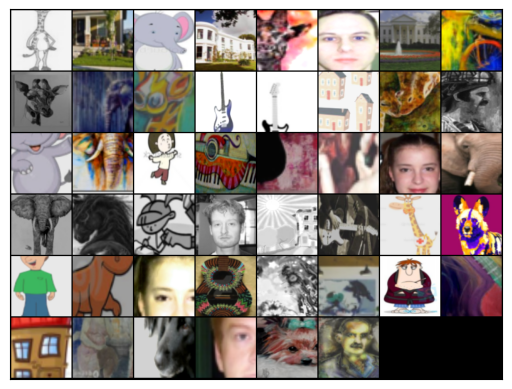

In [7]:
show(make_grid(batch[0][0][:]))

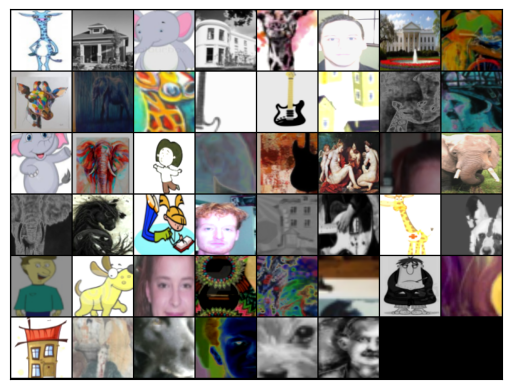

In [8]:
show(make_grid(batch[0][1][:]))